<a href="https://colab.research.google.com/github/KodaiS/ML-study/blob/main/basic_classification_and_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 分類問題

## ライブラリのインポート
便利なツールセットを使えるようにする

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## データを取得

In [ ]:
# データを取得する
iris = load_iris()

X = iris.data   # 特徴量
y = iris.target # 目的変数

feature_names = iris.feature_names # 特徴量の名前
target_names = iris.target_names   # 目的変数の名前

## データの確認

In [ ]:
# データ数（データ数150、特徴量数4）
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (150, 4)
y shape:  (150,)


In [ ]:
# 先頭5データの特徴量を表示 (sepal: がく、petal: 花弁)
print("特徴量の名前: \n", feature_names)
print("特徴量: \n", X[:5])

特徴量の名前: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
特徴量: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
print("目的変数の名前: \n", target_names)
print("目的変数: \n", y)

目的変数の名前: 
 ['setosa' 'versicolor' 'virginica']
目的変数: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


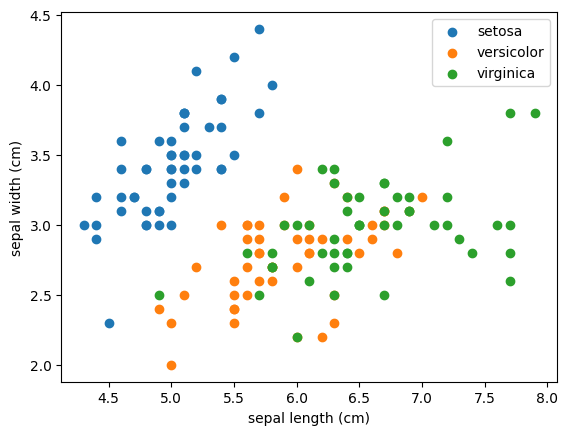

In [ ]:
# プロットに使う特徴量
feat_x = 0
feat_y = 1

# 散布図を描く
plt.scatter(X[y==0, feat_x], X[y==0, feat_y], label=target_names[0])
plt.scatter(X[y==1, feat_x], X[y==1, feat_y], label=target_names[1])
plt.scatter(X[y==2, feat_x], X[y==2, feat_y], label=target_names[2])

# ラベルを描く
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()

plt.show()

## モデルの学習

In [ ]:
# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# ロジスティック回帰モデルのインスタンスを作成
model = LogisticRegression(max_iter=1000)

In [ ]:
# モデルを訓練データで学習
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## テストデータの予測

In [ ]:
# テストデータを予測する
y_pred = model.predict(X_test)

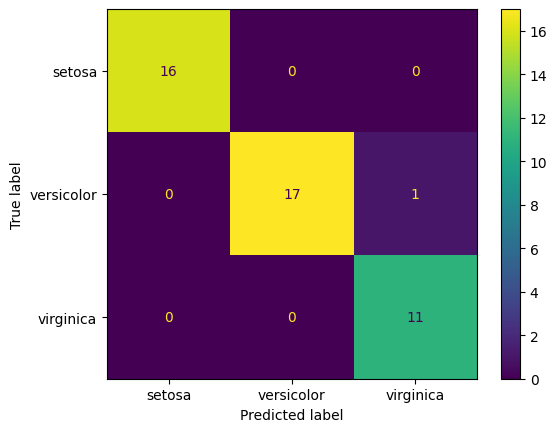

In [ ]:
# 混同行列を表示
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=target_names).plot()
plt.show()

# 回帰問題

## ライブラリのインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## データの取得

In [2]:
# データを取得する
diabetes = load_diabetes()

X = diabetes.data   # 特徴量
y = diabetes.target # 目的変数

feature_names = diabetes.feature_names # 特徴量の名前

## データの確認

In [3]:
# データ数（データ数442、特徴量数10）
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (442, 10)
y shape:  (442,)


In [4]:
# :Attribute Information:
#     - age     age in years
#     - sex
#     - bmi     body mass index
#     - bp      average blood pressure
#     - s1      tc, total serum cholesterol
#     - s2      ldl, low-density lipoproteins
#     - s3      hdl, high-density lipoproteins
#     - s4      tch, total cholesterol / HDL
#     - s5      ltg, possibly log of serum triglycerides level
#     - s6      glu, blood sugar level
# Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of `n_samples` (i.e. the sum of squares of each column totals 1).

# 先頭5データの特徴量を表示
print("特徴量の名前: \n", feature_names)
print("特徴量: \n", X[:5])

特徴量の名前: 
 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
特徴量: 
 [[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]


In [5]:
# :Target: Column 11 is a quantitative measure of disease progression one year after baseline

# 先頭5データの目的変数を表示
print("目的変数: ", y[:5])

目的変数:  [151.  75. 141. 206. 135.]


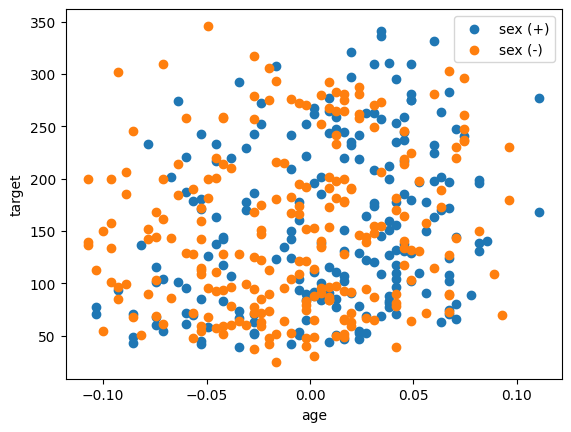

In [16]:
# プロットに使う特徴量
feat_x = 0

plt.scatter(X[X[:, 1] > 0, feat_x], y[X[:, 1] > 0], label="sex (+)")
plt.scatter(X[X[:, 1] < 0, feat_x], y[X[:, 1] < 0], label="sex (-)")
plt.xlabel(feature_names[feat_x])
plt.ylabel("target")
plt.legend()
plt.show()

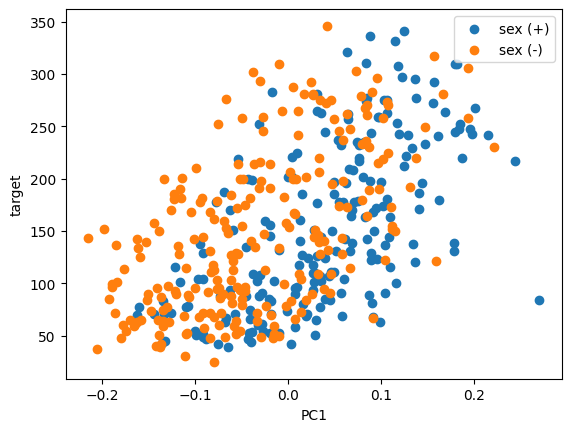

In [18]:
# PCA
pca = PCA()
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[X[:, 1] > 0, 0], y[X[:, 1] > 0], label="sex (+)")
plt.scatter(X_pca[X[:, 1] < 0, 0], y[X[:, 1] < 0], label="sex (-)")
plt.xlabel("PC1")
plt.ylabel("target")
plt.legend()
plt.show()

## モデルの学習とテストデータの予測

In [19]:
# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

RMSE:  55.651766938926656


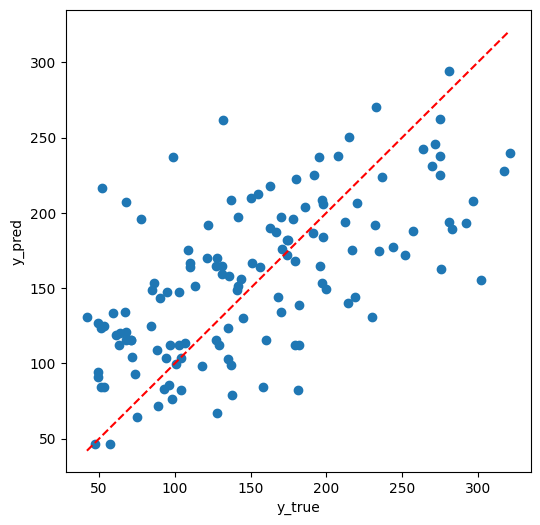

In [36]:
# 線形回帰モデルのインスタンスを作成
lr = LinearRegression()

# モデルを訓練データで学習
lr.fit(X_train, y_train)

# テストデータを予測する
y_pred = lr.predict(X_test)

# 結果を確認
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

min_val = min(y_test)
max_val = max(y_test)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
plt.xlabel("y_true")
plt.ylabel("y_pred")
plt.show()

RMSE:  55.099329627153715


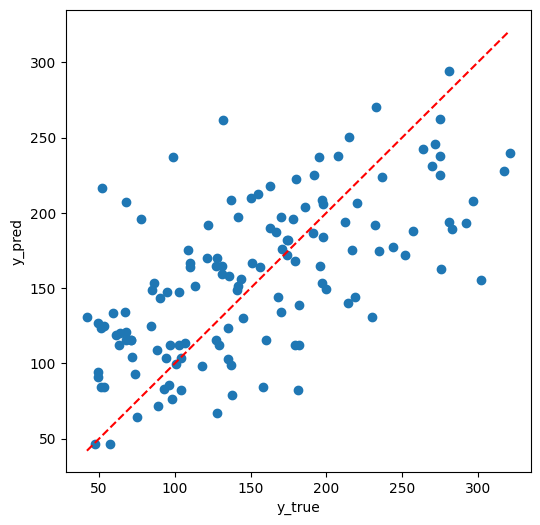

In [55]:
# PCAで次元削減する (10 -> 5)
pca = PCA(n_components=5)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# 次元削減した特徴量で学習
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)

# テストデータを予測
y_pred_pca = lr_pca.predict(X_test_pca)

# 結果を確認
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_pca)))

min_val = min(y_test)
max_val = max(y_test)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
plt.xlabel("y_true")
plt.ylabel("y_pred")
plt.show()

## 参考

In [63]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const)
results = model.fit()
print(results.summary(xname=feature_names + ["const"]))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     37.01
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           1.21e-46
Time:                        21:52:23   Log-Likelihood:                -1665.0
No. Observations:                 309   AIC:                             3352.
Df Residuals:                     298   BIC:                             3393.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          153.7190      3.076     49.970      0.0